In [1]:
import yfinance as yf
import talib
import pandas as pd
# This will show all column and rows rather than just 5 or 6 of them
pd.set_option('display.max_rows', 60)
pd.set_option('display.max_columns', 20)
pd.set_option('display.width', 80)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy


In [2]:
symbol = 'RELIANCE.NS'

df = yf.Ticker(symbol).history(period = '5Y', interval = '1d')

df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2017-01-17,513.994417,515.442274,501.204916,502.532104,18106600,0.0,0.0
2017-01-18,503.183652,505.789856,496.499330,498.333313,7322904,0.0,0.0
2017-01-19,499.588119,504.486750,497.585234,498.888336,7053690,0.0,0.0
2017-01-20,499.008984,500.698181,494.158615,495.075592,4054233,0.0,0.0
2017-01-23,493.145152,497.585280,488.801519,490.297668,6326471,0.0,0.0
...,...,...,...,...,...,...,...
2022-01-11,2436.000000,2474.949951,2435.000000,2455.550049,7478681,0.0,0.0
2022-01-12,2471.300049,2524.949951,2465.000000,2521.100098,6830402,0.0,0.0
2022-01-13,2521.250000,2541.000000,2508.399902,2535.300049,5471871,0.0,0.0


In [3]:
df['MA_10'] = talib.MA(df['Close'], timeperiod = 10)
df['MA_50'] = talib.MA(df['Close'], timeperiod = 50)
df['RSI_14'] = talib.RSI(df['Close'], timeperiod=14)
#use high and low for atr
df['ATR_14'] = talib.ATR(df['High'], df['Low'],df['Close'], timeperiod = 14)
df['Upper_Band'] , df['Middle_Band'], df['Lower_Band'] = talib.BBANDS(df['Close'], timeperiod = 20,
                                                                    nbdevup=2, nbdevdn=2)

In [4]:
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits,MA_10,MA_50,RSI_14,ATR_14,Upper_Band,Middle_Band,Lower_Band
Date,,,,,,,,,,,,,,
2017-01-17,513.994417,515.442274,501.204916,502.532104,18106600,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-18,503.183652,505.789856,496.499330,498.333313,7322904,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-19,499.588119,504.486750,497.585234,498.888336,7053690,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-20,499.008984,500.698181,494.158615,495.075592,4054233,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-23,493.145152,497.585280,488.801519,490.297668,6326471,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-11,2436.000000,2474.949951,2435.000000,2455.550049,7478681,0.0,0.0,2420.735034,2432.817012,55.406937,51.247482,2485.154699,2389.315015,2293.475330
2022-01-12,2471.300049,2524.949951,2465.000000,2521.100098,6830402,0.0,0.0,2432.595044,2432.483013,62.119877,52.544083,2508.011519,2396.710022,2285.408525
2022-01-13,2521.250000,2541.000000,2508.399902,2535.300049,5471871,0.0,0.0,2450.215039,2433.173013,63.405060,51.119513,2529.954665,2403.280029,2276.605393


In [5]:
df.isna().sum()

Open             0
High             0
Low              0
Close            0
Volume           0
Dividends        0
Stock Splits     0
MA_10            9
MA_50           49
RSI_14          14
ATR_14          14
Upper_Band      19
Middle_Band     19
Lower_Band      19
dtype: int64

In [6]:
df.dropna(inplace=True)

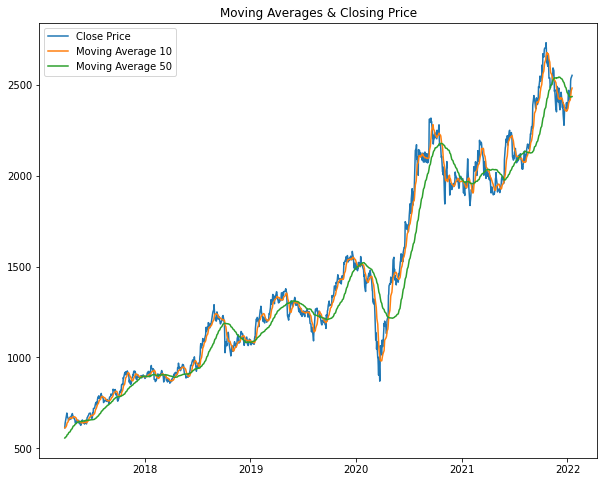

In [7]:
plt.figure(figsize=(10,8))
plt.plot(df['Close'],label = 'Close Price')
plt.plot(df['MA_10'], label = 'Moving Average 10')
plt.plot(df['MA_50'], label = 'Moving Average 50')
#plt.plot(df['Upper_Band'], label = 'Upper Band')
#plt.plot(df['Lower_Band'], label = 'Lower Band', color = 'black')
plt.title('Moving Averages & Closing Price')
plt.legend()

Text(0.5, 1.0, 'Rsi Indicator')

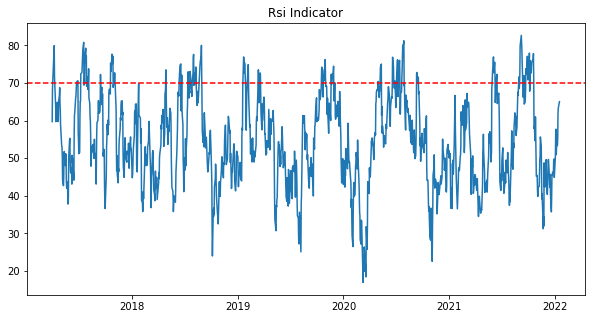

In [8]:
plt.figure(figsize=(10,5))
plt.plot(df['RSI_14'])
rx = [70] * len(df)
plt.axhline(70,color = 'red', linestyle = '--')
plt.title('Rsi Indicator')

# Signals Generation

In [9]:
symbol_trades = []
trade = {'symbol': None, 'Buy/Sell': None, 'entry': None, 'entry_date': None, 'exit': None, 'exit_date': None}

In [10]:
position = None

for i in df.index:
    if ((df['MA_10'][i] > df['MA_50'][i]) and (df['RSI_14'][i] > 70) and (position != 'Buy')):

        if trade['symbol'] is not None:
            trade['exit'] = df['Close'][i]
            trade['exit_date'] = i
            symbol_trades.append(copy.deepcopy(trade))

        if position is not None:
            trade['symbol'] = symbol
            trade['Buy/Sell'] = 'Buy'
            trade['entry'] = df['Close'][i]
            trade['entry_date'] = i
        position = 'Buy'
        print('Buy')

    if ((df['MA_10'][i] < df['MA_50'][i]) and (df['RSI_14'][i] < 30) and (position !='Sell')):
        
        if trade['symbol'] is not None:
            trade['exit'] = df['Close'][i]
            trade['exit_date'] = i
            symbol_trades.append(copy.deepcopy(trade))
        
        if position is not None:
            trade['symbol'] = symbol
            trade['Buy/Sell'] = 'Sell'
            trade['entry'] = df['Close'][i]
            trade['entry_date'] = i
        position='Sell'
        print('Sell')

Buy
Sell
Buy
Sell
Buy
Sell
Buy
Sell
Buy


In [11]:
pd.DataFrame(symbol_trades)

,symbol,Buy/Sell,entry,entry_date,exit,exit_date
0,RELIANCE.NS,Sell,1026.113159,2018-10-05,1210.869141,2019-01-21
1,RELIANCE.NS,Buy,1210.869141,2019-01-21,1155.300415,2019-07-30
2,RELIANCE.NS,Sell,1155.300415,2019-07-30,1373.792480,2019-10-17
3,RELIANCE.NS,Buy,1373.792480,2019-10-17,1388.696289,2020-01-31
4,RELIANCE.NS,Sell,1388.696289,2020-01-31,1442.162476,2020-04-30
5,RELIANCE.NS,Buy,1442.162476,2020-04-30,2022.593384,2020-10-26
6,RELIANCE.NS,Sell,2022.593384,2020-10-26,2153.372803,2021-05-31


# Def Function for all this code

In [12]:
def symbol_back_test(symbol_list):
    
    all_trades = []
    for symbol in symbol_list:
        
        df = yf.Ticker(symbol).history(period = '7Y', interval = '1d')
        df['MA_10'] = talib.MA(df['Close'], timeperiod = 10)
        df['MA_50'] = talib.MA(df['Close'], timeperiod = 50)
        df['RSI_14'] = talib.RSI(df['Close'], timeperiod=14)
        #use high and low for atr
        df['ATR_14'] = talib.ATR(df['High'], df['Low'],df['Close'], timeperiod = 14)
        df['Upper_Band'] , df['Middle_Band'], df['Lower_Band'] = talib.BBANDS(df['Close'], timeperiod = 20,
                                                                            nbdevup=2, nbdevdn=2)
                                                                            
        trade = {'symbol': None, 'Buy/Sell': None, 'entry': None, 'entry_date': None, 'exit': None, 'exit_date': None}

        position = None

        for i in df.index:
            if ((df['MA_10'][i] > df['MA_50'][i]) and (df['RSI_14'][i] > 70) and (position != 'Buy')):

                if trade['symbol'] is not None:
                    trade['exit'] = df['Close'][i]
                    trade['exit_date'] = i
                    all_trades.append(copy.deepcopy(trade))

                if position is not None:
                    trade['symbol'] = symbol
                    trade['Buy/Sell'] = 'Buy'
                    trade['entry'] = df['Close'][i]
                    trade['entry_date'] = i
                position = 'Buy'
                #print('Buy')

            if ((df['MA_10'][i] < df['MA_50'][i]) and (df['RSI_14'][i] < 30) and (position !='Sell')):
                
                if trade['symbol'] is not None:
                    trade['exit'] = df['Close'][i]
                    trade['exit_date'] = i
                    all_trades.append(copy.deepcopy(trade))
                
                if position is not None:
                    trade['symbol'] = symbol
                    trade['Buy/Sell'] = 'Sell'
                    trade['entry'] = df['Close'][i]
                    trade['entry_date'] = i
                position='Sell'
                #print('Sell')
    #return pd.DataFrame(symbol_trades)
    return all_trades

In [13]:
symbol_list = ['TATAMOTORS.NS', 'HEROMOTOCO.NS', 'COALINDIA.NS', 'TRIDENT.NS', 'VEDL.NS','IDEA.NS',
        'BAJAJFINSV.NS','SANWARIA.BO']
signal = symbol_back_test(symbol_list)
df = pd.DataFrame(signal)

In [14]:
if len(df) > 0:
    df['PnL'] = np.where(df['Buy/Sell'] == 'Buy', df['exit'] - df['entry'],
                                                df['entry'] - df['exit'])
    df['pnl_percent'] = (df['PnL'] / df['entry']) * 100
else:
    print('No Trades')

In [15]:
df

,symbol,Buy/Sell,entry,entry_date,exit,exit_date,PnL,pnl_percent
0,TATAMOTORS.NS,Buy,459.463898,2016-05-31,419.600006,2017-05-05,-39.863892,-8.676175
1,TATAMOTORS.NS,Sell,419.600006,2017-05-05,216.050003,2019-04-10,203.550003,48.510486
2,TATAMOTORS.NS,Buy,216.050003,2019-04-10,169.449997,2019-05-15,-46.600006,-21.569084
3,TATAMOTORS.NS,Sell,169.449997,2019-05-15,172.449997,2019-10-29,-3.000000,-1.770434
4,TATAMOTORS.NS,Buy,172.449997,2019-10-29,144.550003,2020-02-26,-27.899994,-16.178599
...,...,...,...,...,...,...,...,...
71,SANWARIA.BO,Sell,18.900000,2018-02-08,1.700000,2020-04-21,17.200000,91.005291
72,SANWARIA.BO,Buy,1.700000,2020-04-21,1.830000,2020-09-09,0.130000,7.647058
73,SANWARIA.BO,Sell,1.830000,2020-09-09,0.760000,2021-06-03,1.070000,58.469947
74,SANWARIA.BO,Buy,0.760000,2021-06-03,0.680000,2021-08-17,-0.080000,-10.526314


In [16]:
df['PnL'].sum()

290.5805917978287

Text(0.5, 1.0, 'count of Profit & Loss line plot')

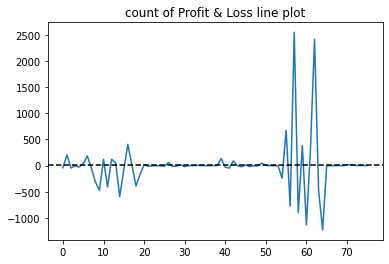

In [18]:
plt.plot(df['PnL'])
plt.axhline(df['PnL'].mean(),linestyle = '--', color = 'black')
plt.title('count of Profit & Loss line plot')

Text(0.5, 1.0, 'Year wise profit and loss')

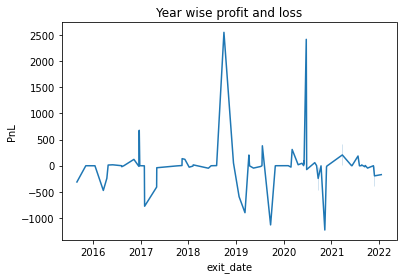

In [20]:
sns.lineplot(x = df['exit_date'], y= df['PnL'])
plt.title('Year wise profit and loss')